In [44]:
import networkx as nx
import igraph as ig

In [ ]:
def PNSubGraph(visited, graph, node):
  visited.append(node)
  queue.append(node)
  
  PN[node] = [element *-1 for element in data[node][0:threshPN]]
  Level[node] = 0 
  while queue:
    s = queue.pop(0) 
    print (s, end = " ") 
    
    if s not in list(data.keys()) : 
        break
    len_pn = len(PN[s])
    if  len_pn < 2 : 
       for i in data[s][0:threshPN-len_pn] :
            PN[s].append(-1*i)
    for neighbour in data[s]:
       if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
        
        #Distance_Path_To_Root = Level[s] + Distance[s][neighbour]
        #Have_Parent = CheckHaveParent(PN[neighbour])
        # if  Have_Parent : 
        #     Level[neighbour] = Distance_Path_To_Root
        # else :
        #     Level[neighbour] = -Distance_Path_To_Root 

       if len(PN[neighbour]) < threshPN : 
           PN[neighbour].append(s)

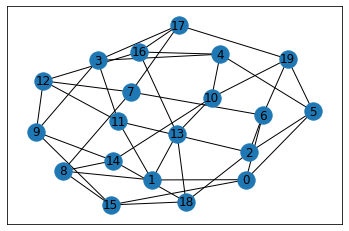

In [45]:
G = nx.random_regular_graph(4, 20)
nx.draw_networkx(G)

In [46]:
V = list(G.degree())
V.sort(key=lambda tup: tup[0])
V = [list(_) for _ in V]
N_vertex = len(V)
V


[[0, 4],
 [1, 4],
 [2, 4],
 [3, 4],
 [4, 4],
 [5, 4],
 [6, 4],
 [7, 4],
 [8, 4],
 [9, 4],
 [10, 4],
 [11, 4],
 [12, 4],
 [13, 4],
 [14, 4],
 [15, 4],
 [16, 4],
 [17, 4],
 [18, 4],
 [19, 4]]

In [47]:
edge_df = nx.to_pandas_edgelist(G)
edge_df


,source,target
0,7,17
1,7,6
2,7,12
3,7,8
4,17,3
5,17,19
6,17,16
7,3,4
8,3,9
9,3,11


In [48]:
edge_list = edge_df.values
edge_list

array([[ 7, 17],
       [ 7,  6],
       [ 7, 12],
       [ 7,  8],
       [17,  3],
       [17, 19],
       [17, 16],
       [ 3,  4],
       [ 3,  9],
       [ 3, 11],
       [ 4,  5],
       [ 4, 10],
       [ 4, 16],
       [12, 16],
       [12,  9],
       [12, 11],
       [16, 13],
       [ 0,  5],
       [ 0,  1],
       [ 0,  6],
       [ 0, 15],
       [ 5, 19],
       [ 5,  2],
       [19,  6],
       [19, 10],
       [ 9, 14],
       [ 9, 15],
       [14, 18],
       [14,  8],
       [14, 10],
       [ 8, 15],
       [ 8,  1],
       [15, 18],
       [ 2, 11],
       [ 2,  6],
       [ 2, 18],
       [11,  1],
       [18, 13],
       [ 1, 13],
       [10, 13]], dtype=int64)

In [49]:
E =  [[] for _ in range(N_vertex)]
for e in edge_list:
    E[e[0]].append(e[1])
    E[e[1]].append(e[0])
for e in E:
    e.sort()
E

[[1, 5, 6, 15],
 [0, 8, 11, 13],
 [5, 6, 11, 18],
 [4, 9, 11, 17],
 [3, 5, 10, 16],
 [0, 2, 4, 19],
 [0, 2, 7, 19],
 [6, 8, 12, 17],
 [1, 7, 14, 15],
 [3, 12, 14, 15],
 [4, 13, 14, 19],
 [1, 2, 3, 12],
 [7, 9, 11, 16],
 [1, 10, 16, 18],
 [8, 9, 10, 18],
 [0, 8, 9, 18],
 [4, 12, 13, 17],
 [3, 7, 16, 19],
 [2, 13, 14, 15],
 [5, 6, 10, 17]]

In [52]:
level = [-1]*len(V)
count = [0]*len(V)

In [64]:
thresh_PN = 2
C_id = [None] * N_vertex
PN = [[-N_vertex-1]*thresh_PN for _ in range(N_vertex)]
size = [0]*N_vertex
Q = [-1]  
for i in range(N_vertex):
    start = 0
    end = 1
    Q.insert(0, V[i][0])
    level[i] = 0
    C_id[i] = V[i]
    while start!=end:
        stop = end
        j = start
        while j <= end:
            for d in E[Q[j]]:
                if level[d]==-1:
                    Q.append(d)
                    end+=1
                    level[d]=level[Q[j]]+1
                    C_id[d]=C_id[Q[j]]
                if count[d] < thresh_PN:
                    if level[Q[j]] < level[d]:
                        PN[d][count[d]] = Q[j]
                        count[d]+=1
                    elif level[Q[j]] == level[d]:
                        PN[d][count[d]] = -Q[j]
                        count[d]+=1
            j+=1
        start=stop
    size[i]=end
                        
PN

[[-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21],
 [-21, -21]]